# Exercicio 2
* Arthur Severo
* Victor Le Roy

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Coletando os dados**

In [19]:
df = pd.read_csv('./data/data2.txt', sep=',', header=None, names=['House size', 'Number of bedrooms', 'House price'])
house_sizes = df['House size'].values
number_of_bedrooms = df['Number of bedrooms'].values
house_prices = df['House price'].values

print(df)

    House size  Number of bedrooms  House price
0         2104                   3       399900
1         1600                   3       329900
2         2400                   3       369000
3         1416                   2       232000
4         3000                   4       539900
5         1985                   4       299900
6         1534                   3       314900
7         1427                   3       198999
8         1380                   3       212000
9         1494                   3       242500
10        1940                   4       239999
11        2000                   3       347000
12        1890                   3       329999
13        4478                   5       699900
14        1268                   3       259900
15        2300                   4       449900
16        1320                   2       299900
17        1236                   3       199900
18        2609                   4       499998
19        3031                   4      

**3. Plotando a funcao sem normalizar**

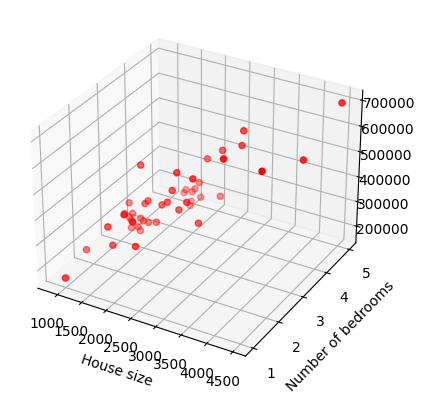

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(house_sizes, number_of_bedrooms, house_prices, zdir="z" ,c='r', marker='o')
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

**4. Feature Normalization**

In [21]:
norm_house_sizes = []
norm_number_of_bedrooms = []
norm_house_prices = []

mean_house_sizes = np.mean(house_sizes)
mean_number_of_bedrooms = np.mean(number_of_bedrooms)
mean_house_prices = np.mean(house_prices)

for i in range(len(house_sizes)):
  norm_house_sizes.append(house_sizes[i] - mean_house_sizes)
  norm_number_of_bedrooms.append(number_of_bedrooms[i] - mean_number_of_bedrooms)
  norm_house_prices.append(house_prices[i] - mean_house_prices)

std_house_sizes = np.std(house_sizes)
std_number_of_bedrooms = np.std(number_of_bedrooms)
std_house_prices = np.std(house_prices)

for i in range(len(house_sizes)):
  norm_house_sizes[i] = norm_house_sizes[i] / std_house_sizes
  norm_number_of_bedrooms[i] = norm_number_of_bedrooms[i] / std_number_of_bedrooms
  norm_house_prices[i] = norm_house_prices[i] / std_house_prices

norm_house_sizes = np.array(norm_house_sizes)
norm_number_of_bedrooms = np.array(norm_number_of_bedrooms)
norm_house_prices = np.array(norm_house_prices)


**5. Plotando a funcao normalizada**

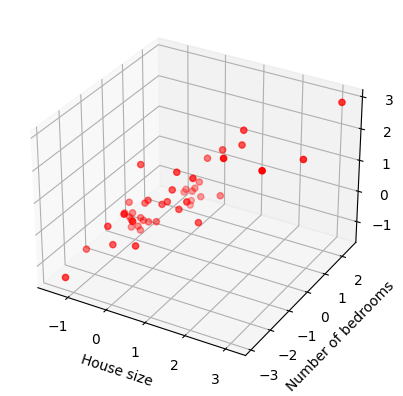

In [22]:
ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_number_of_bedrooms, norm_house_prices, zdir="z" ,c='r', marker='o')
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

**6. Gradiente descendente**

In [23]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.01
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_1 = []
loss_error_per_epoch_1 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - norm_house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_number_of_bedrooms)
    h_per_epoch_1.append(h)
    loss_error_per_epoch_1.append((1 / (2 * m)) * np.sum(np.square(h - norm_house_prices)))

h_per_epoch_1.append(theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms)

In [24]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.03
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_2 = []
loss_error_per_epoch_2 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - norm_house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_number_of_bedrooms)
    h_per_epoch_2.append(h)
    loss_error_per_epoch_2.append((1 / (2 * m)) * np.sum(np.square(h - norm_house_prices)))

h_per_epoch_2.append(theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms)

In [25]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.1
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_3 = []
loss_error_per_epoch_3 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - norm_house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - norm_house_prices) * norm_number_of_bedrooms)
    h_per_epoch_3.append(h)
    err = 0
    loss_error_per_epoch_3.append((1 / (2 * m)) * np.sum(np.square(h - norm_house_prices)))

h_per_epoch_3.append(theta_0 + theta_1 * norm_house_sizes + theta_2 * norm_number_of_bedrooms)

**7.1. Plot do gradiente com alpha 0.01**

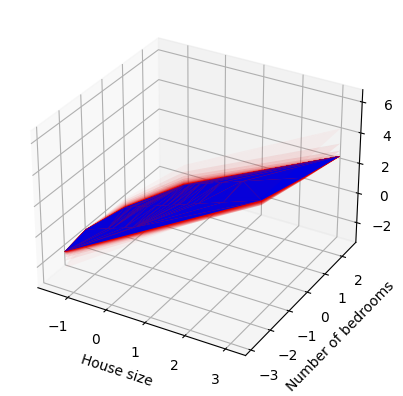

In [26]:
ax = plt.axes(projection='3d')
for index, h in enumerate(h_per_epoch_1):
    if index % 50 == 0 and index != (len(h_per_epoch_1) - 1):
        ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h, linewidth=0, alpha=index/len(h_per_epoch_1), color='r')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_1[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Resultado final

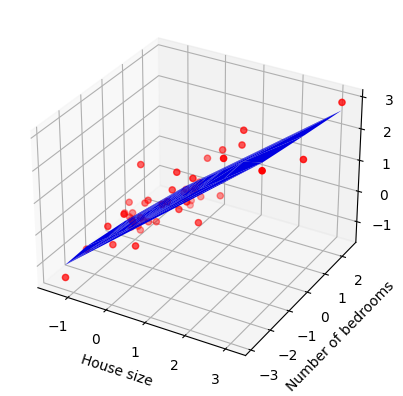

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_number_of_bedrooms, norm_house_prices, zdir="z" ,c='r', marker='o')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_1[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Erro

Erro final: 1.2627184944106375


Text(0, 0.5, 'Loss Error')

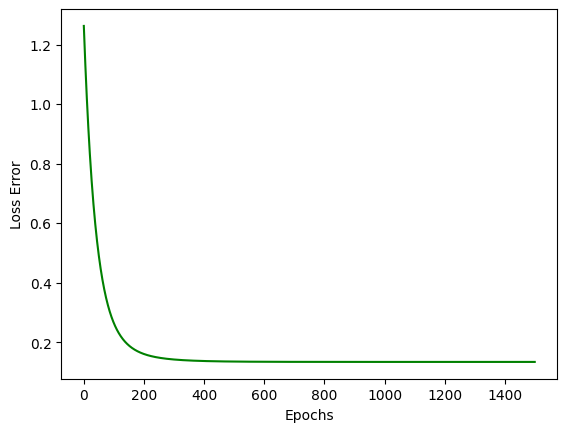

In [28]:
print(f"Erro final: {loss_error_per_epoch_1[0]}")
plt.plot(loss_error_per_epoch_1, c='g', alpha=1, label='Loss Error')
plt.xlabel('Epochs')
plt.ylabel('Loss Error')

**7.2. Plot do gradiente com alpha 0.03**

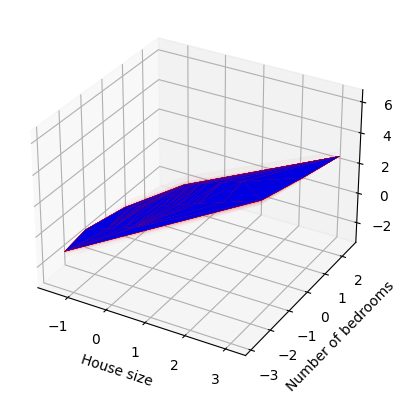

In [29]:
ax = plt.axes(projection='3d')
for index, h in enumerate(h_per_epoch_2):
    if index % 50 == 0 and index != (len(h_per_epoch_2) - 1):
        ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h, linewidth=0, alpha=index/len(h_per_epoch_2), color='r')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_2[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Resultado final

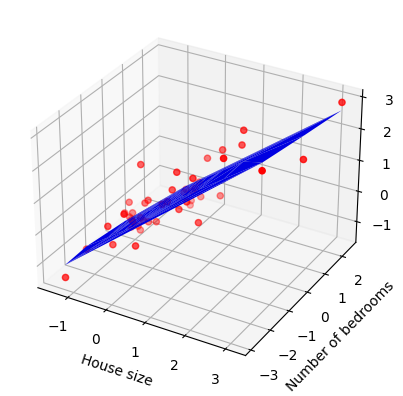

In [30]:
ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_number_of_bedrooms, norm_house_prices, zdir="z" ,c='r', marker='o')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_2[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Erro

Erro final: 1.2627184944106375


Text(0, 0.5, 'Loss Error')

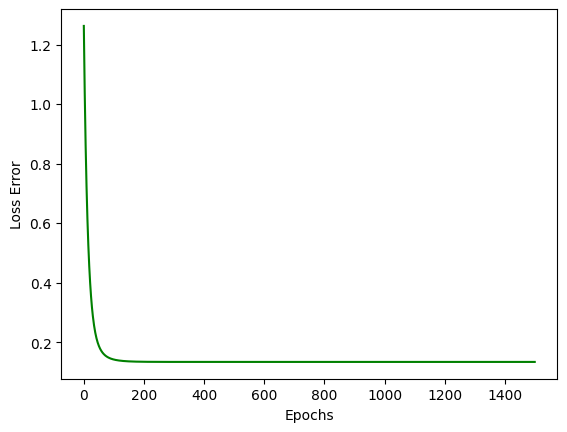

In [31]:
print(f"Erro final: {loss_error_per_epoch_2[0]}")
plt.plot(loss_error_per_epoch_2, c='g', alpha=1, label='Loss Error')
plt.xlabel('Epochs')
plt.ylabel('Loss Error')

**7.3. Plot do gradiente com alpha 0.1**

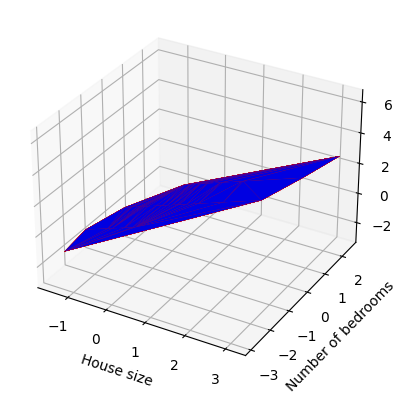

In [32]:
ax = plt.axes(projection='3d')
for index, h in enumerate(h_per_epoch_3):
    if index % 50 == 0 and index != (len(h_per_epoch_3) - 1):
        ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h, linewidth=0, alpha=index/len(h_per_epoch_3), color='r')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_3[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Resultado final

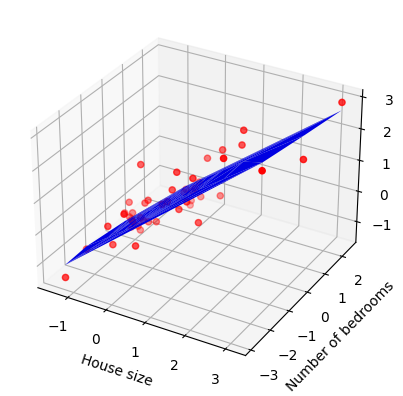

In [33]:
ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_number_of_bedrooms, norm_house_prices, zdir="z" ,c='r', marker='o')
ax.plot_trisurf(norm_house_sizes, norm_number_of_bedrooms, h_per_epoch_3[-1], linewidth=0, alpha=1, color='b', antialiased=True)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

* Erro

Erro final: 1.2627184944106375


Text(0, 0.5, 'Loss Error')

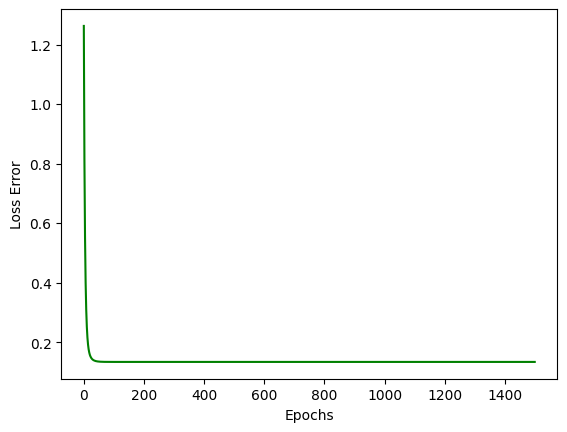

In [34]:
print(f"Erro final: {loss_error_per_epoch_1[0]}")
plt.plot(loss_error_per_epoch_3, c='g', alpha=1, label='Loss Error')
plt.xlabel('Epochs')
plt.ylabel('Loss Error')

**8. Veja que agora não é possível traçar o ajuste linear como no exercício anterior. Por quê?**

O ajuste linear não pode ser traçado da mesma forma pois o resultado é um plano, dado que existem três coordenadas no contexto do problema, e os valores considerados para sua formação são diferentes dos originais por consequência da normalização realizada nas _features_.